In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r'C:\Users\Suresh\Downloads\car_price.csv')

In [3]:
dataset.shape

(5512, 9)

In [63]:
dataset.head(2)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,company_name,Year
0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,1956,5,Jeep,2022
1,Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,1330,5,Renault,2022


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   engine               5512 non-null   int64  
 7   Seats                5512 non-null   int64  
 8   company_name         5512 non-null   object 
 9   Year                 5512 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 430.8+ KB


In [11]:
(dataset.isnull().sum()/dataset.shape[0])*100

car_name               0.0
car_prices_in_rupee    0.0
kms_driven             0.0
fuel_type              0.0
transmission           0.0
ownership              0.0
engine                 0.0
Seats                  0.0
manufacture            0.0
dtype: float64

In [13]:
dataset.dropna(inplace=True)

# car_name

In [15]:
dataset['company_name']=dataset['car_name'].apply(lambda x:x[:x.index(' ')])

In [17]:
dataset['car_name']=dataset ['car_name'].apply(lambda x:x[x.index(' ')+1:])

# car_prices_in_rupee

In [19]:
dataset['car_prices_in_rupee']=dataset['car_prices_in_rupee'].str.replace(',','')

In [21]:
def price_change(x):
    p=x.split(' ')
    try:
        if p[1]=='Lakh':
            return str(round(float(p[0])*100000,1))
        elif p[1]=='Crore':
            return str(round(float(p[0])*10000000,1))
    except:
        return x
    

In [23]:
dataset['car_prices_in_rupee']=dataset['car_prices_in_rupee'].apply(price_change)

In [25]:
dataset['car_prices_in_rupee']=dataset['car_prices_in_rupee'].astype('float')

# kms_driven

In [27]:
dataset['kms_driven']=dataset['kms_driven'].str.replace(',','')
dataset['kms_driven']=dataset['kms_driven'].str.replace('kms','')

In [29]:
dataset['kms_driven']=dataset['kms_driven'].astype('int64')

# engine

In [31]:
dataset['engine']=dataset['engine'].str.replace(' cc','')

In [33]:
dataset['engine']=dataset['engine'].astype('int64')

# Seats

In [35]:
dataset['Seats']=dataset['Seats'].str.replace(' Seats','')
dataset['Seats']=dataset['Seats'].astype('int64')

# manufacture

In [37]:
dataset['manufacture']=pd.to_datetime(dataset['manufacture'])

In [39]:
dataset['Year']=dataset['manufacture'].dt.strftime('%Y')

In [41]:
dataset.drop(columns=['manufacture'],inplace=True)

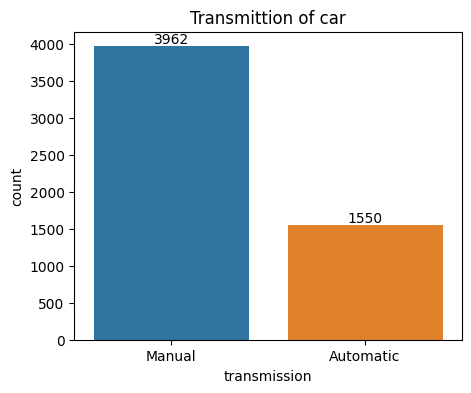

In [69]:
fig=plt.figure(figsize=(5,4))
ax=sns.countplot(x='transmission',data=dataset,hue='transmission')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('Transmittion of car')
plt.show()

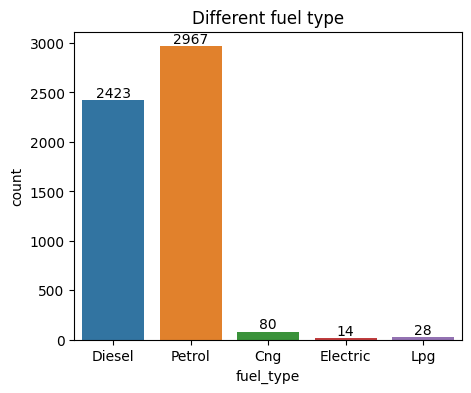

In [71]:
fig=plt.figure(figsize=(5,4))
ax=sns.countplot(x='fuel_type',data=dataset,hue='fuel_type')
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('Different fuel type')
plt.show()

Text(0.5, 1.0, 'Car related to Seats')

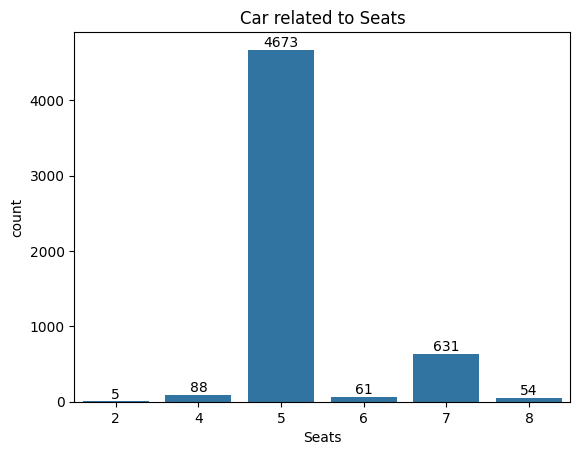

In [153]:
ax=sns.countplot(x='Seats',data=dataset)
for x in ax.containers:
    ax.bar_label(x)
ax.set_title('Car related to Seats')

# Conclusion:

In the above graph we see 5 seater manual car with fuel type Petrol sold more than others.